In [7]:
import numpy as np
import pandas as pd

# For visualization
import seaborn as sns
import matplotlib.pyplot as plt

# For modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

sns.set_palette('Set2')

In [8]:
#pandas data frames
df = pd.read_csv('tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [9]:
#  Getting the number of rows and columns in our dataset
df.shape

(244, 7)

In [10]:
# Getting the basic info of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [11]:
# to get basic discript
df.describe()


,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


<AxesSubplot:>

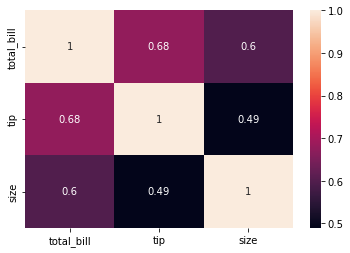

In [14]:
# Getting the correlation of numerical variables
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:xlabel='tip', ylabel='Count'>

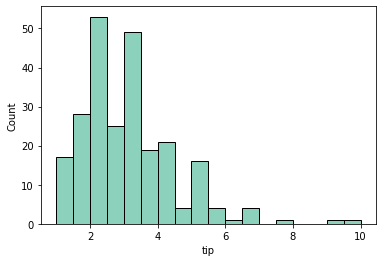

In [15]:
sns.histplot(x='tip', data=df)

TypeError: 'AxesSubplot' object is not subscriptable

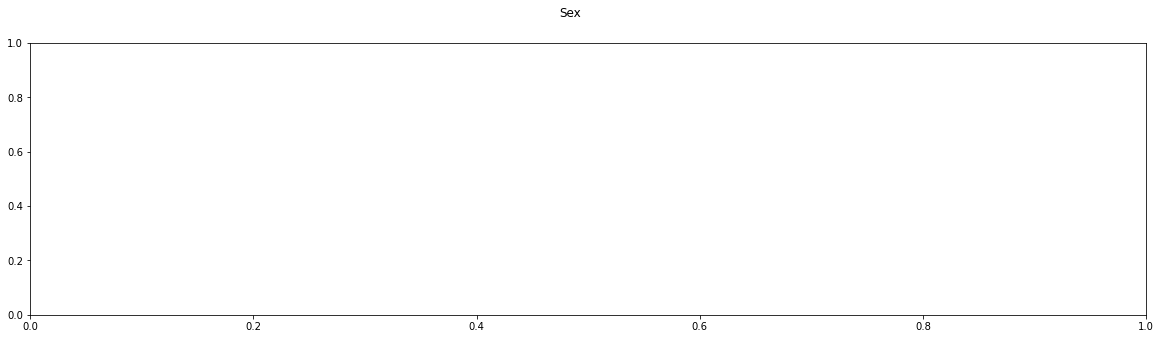

In [18]:
#sex
fig, ax = plt.subplots( figsize=(20,5))

fig.suptitle('Sex')


sns.boxplot(x='sex', y='tip', hue='sex', data=df, ax=ax[1])


ax[1].set_title('Relationship of "sex" and "tips"')

plt.show()

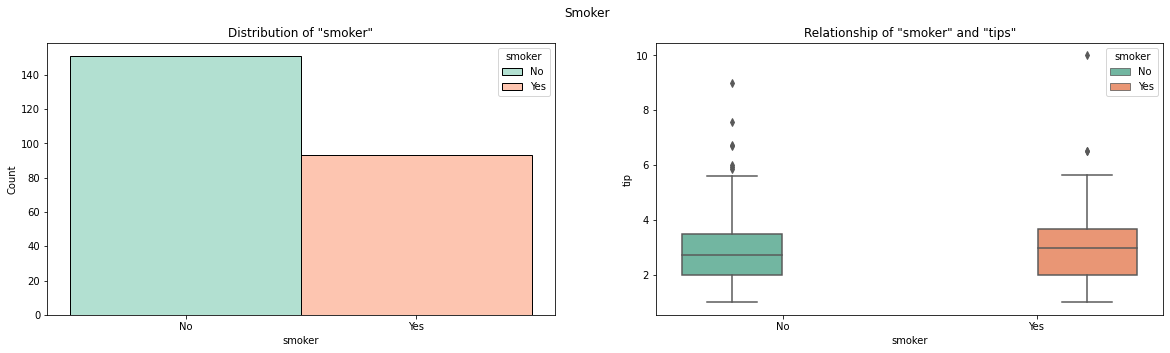

In [12]:
fig, ax = plt.subplots(ncols=2, figsize=(20,5))

fig.suptitle('Smoker')

sns.histplot(x='smoker', data=df, hue='smoker', ax=ax[0])
sns.boxplot(x='smoker', y='tip', hue='smoker', data=df, ax=ax[1])

ax[0].set_title('Distribution of "smoker"')
ax[1].set_title('Relationship of "smoker" and "tips"')

plt.show()

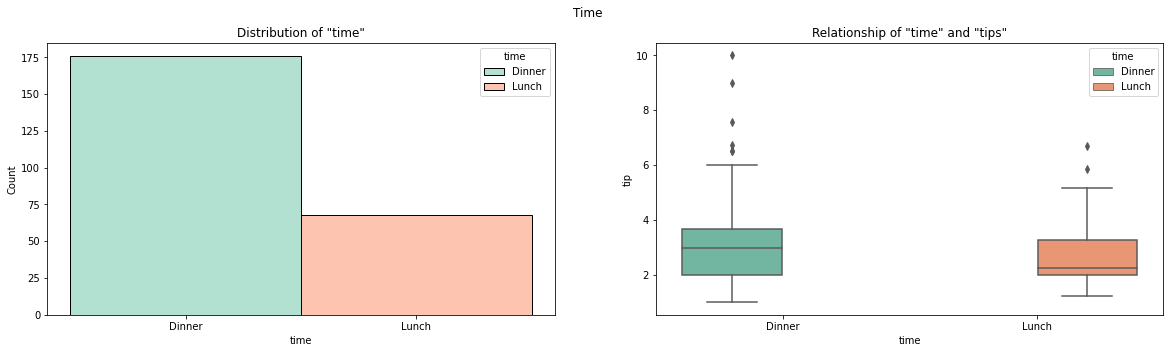

In [13]:
fig, ax = plt.subplots(ncols=2, figsize=(20,5))

fig.suptitle('Time')

sns.histplot(x='time', data=df, hue='time', ax=ax[0])
sns.boxplot(x='time', y='tip', hue='time', data=df, ax=ax[1])

ax[0].set_title('Distribution of "time"')
ax[1].set_title('Relationship of "time" and "tips"')

plt.show()

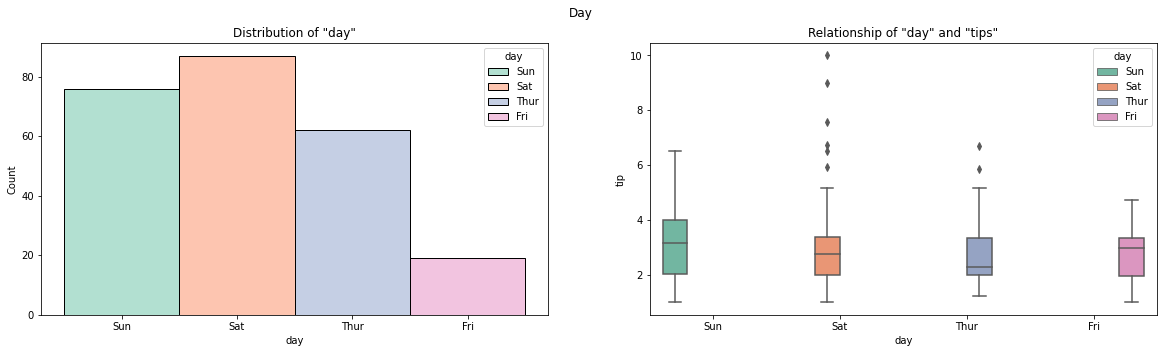

In [14]:
fig, ax = plt.subplots(ncols=2, figsize=(20,5))

fig.suptitle('Day')

sns.histplot(x='day', data=df, hue='day', ax=ax[0])
sns.boxplot(x='day', y='tip', hue='day', data=df, ax=ax[1])

ax[0].set_title('Distribution of "day"')
ax[1].set_title('Relationship of "day" and "tips"')

plt.show()


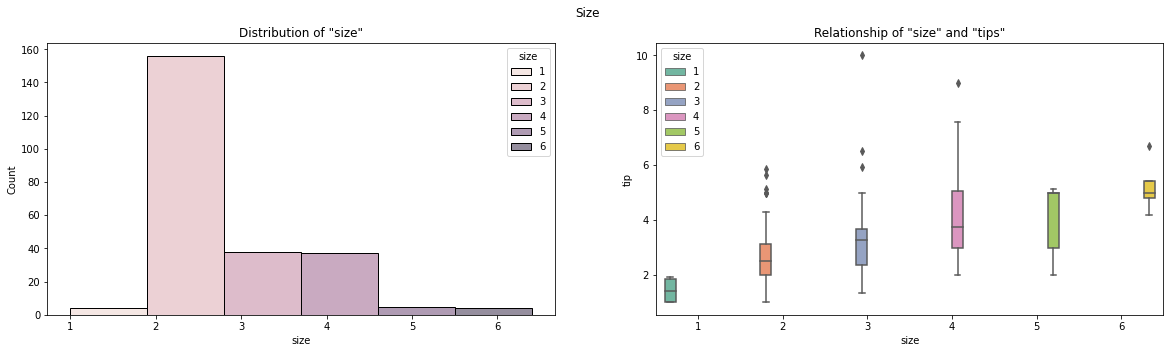

In [15]:
fig, ax = plt.subplots(ncols=2, figsize=(20,5))

fig.suptitle('Size')

sns.histplot(x='size', data=df, hue='size', ax=ax[0], binwidth=.9)
sns.boxplot(x='size', y='tip', hue='size', data=df, ax=ax[1])

ax[0].set_title('Distribution of "size"')
ax[1].set_title('Relationship of "size" and "tips"')

plt.show()

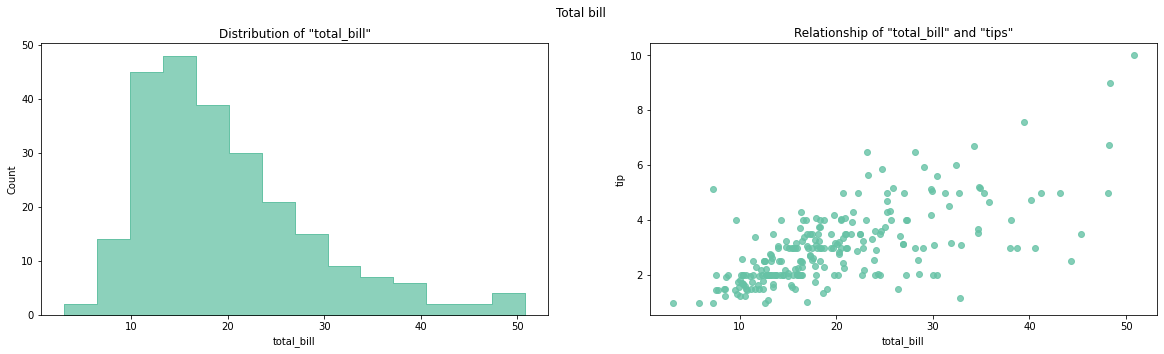

In [16]:
fig, ax = plt.subplots(ncols=2, figsize=(20,5))

fig.suptitle('Total bill')

sns.histplot(x='total_bill', data=df, element='step', ax=ax[0])
sns.regplot(x='total_bill', y='tip', data=df, fit_reg=False, ax=ax[1])

ax[0].set_title('Distribution of "total_bill"')
ax[1].set_title('Relationship of "total_bill" and "tips"')

plt.show()

In [17]:
#Preparing the Data
#Standarization of numerical variables 
scaler = preprocessing.MinMaxScaler()
df[["tip"]] = scaler.fit_transform(df[["tip"]])
df[["total_bill"]] = scaler.fit_transform(df[["total_bill"]])

df.head()

,total_bill,tip,sex,smoker,day,time,size
0,0.291579,0.001111,Female,No,Sun,Dinner,2
1,0.152283,0.073333,Male,No,Sun,Dinner,3
2,0.375786,0.277778,Male,No,Sun,Dinner,3
3,0.431713,0.256667,Male,No,Sun,Dinner,2
4,0.450775,0.290000,Female,No,Sun,Dinner,4


In [18]:
X = df.drop(columns=['tip'])
y = df['tip']

print('Categorical columns: ')
for col in X.columns:
    if X[col].dtype == 'object':
        print(str(col)+' '+str(X[col].unique()))
        label = LabelEncoder()
        label = label.fit(X[col])
        X[col] = label.transform(X[col].astype(str))

Categorical columns: 
sex ['Female' 'Male']
smoker ['No' 'Yes']
day ['Sun' 'Sat' 'Thur' 'Fri']
time ['Dinner' 'Lunch']


In [19]:
X.head()

,total_bill,sex,smoker,day,time,size
0,0.291579,0,0,2,0,2
1,0.152283,1,0,2,0,3
2,0.375786,1,0,2,0,3
3,0.431713,1,0,2,0,2
4,0.450775,0,0,2,0,4


In [20]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [21]:
from sklearn.linear_model import LinearRegression, LassoCV, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [22]:
models = {}
def train_validate_predict(regressor, x_train, y_train, x_test, y_test, index):
    model = regressor
    model.fit(x_train, y_train)
    
    y_pred = model.predict(x_test)

    r2 = r2_score(y_test, y_pred)
    models[index] = r2

In [24]:
model_list = [LinearRegression, LassoCV, Ridge, DecisionTreeRegressor, KNeighborsRegressor,
              RandomForestRegressor]
model_names = ['Linear Regression', 'LassoCV', 'Ridge', 'Decision Tree Regressor', 
               'KNeighbors Regressor', 'Random Forest Regressor']

index = 0
for regressor in model_list:
    train_validate_predict(regressor(), x_train, y_train, x_test, y_test, model_names[index])
    index+=1

In [25]:
models

{'Linear Regression': 0.5934725709682472,
 'LassoCV': 0.5892722252027067,
 'Ridge': 0.5675636232382675,
 'Decision Tree Regressor': -0.2442251380546958,
 'KNeighbors Regressor': 0.3420719345556361,
 'Random Forest Regressor': 0.4516594605793004}

In [27]:
model = Ridge()
model.fit(x_train, y_train)
    
y_pred = model.predict(x_test)
preds = pd.DataFrame({'y_pred': y_pred, 'y_test':y_test})
preds = preds.sort_values(by='y_test')
preds = preds.reset_index()

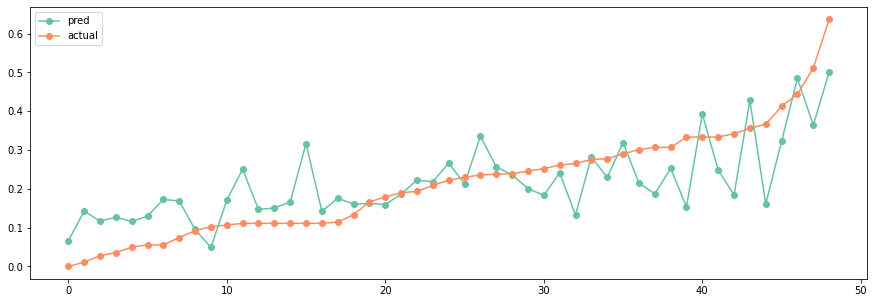

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
plt.plot(preds['y_pred'], label='pred', marker='o')
plt.plot(preds['y_test'], label='actual', marker='o')
plt.legend()
plt.show()